**<div align="center">Computational Bionics
Project Exercise 1</div>**

**<div align="center">Yash Waware E12329556</div>**


![Free Body Diagram](Free_body_diagram.png)


*Ground reaction force [GRF]*

GRF exists <u>only in the stance phase</u> : 
* First peak of the <u>vertical GRF</u> occurs at 15% of the gait cycle.
* Second peak, the maximum vertical GRF occurs at the 48% of the gait cycle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


In [2]:
# Read the Excel file
df = pd.read_excel('gait_data.xls', header=None, engine='xlrd')

# Define the column names manually
column_names = ['gait %', 'GRFz [%BW]', 'GRFx [%BW]', 'MX_F [Nm/kg]', 'Flex_Ext_F [deg]', 'MX_K [Nm/kg]', 'Flex_Ext_K [deg]', 'MX_H [Nm/kg]', 'Flex_Ext_H [deg]']
df.columns = column_names

# Display the column names to verify
print(df.columns)

# Display the first few rows
print(df.head())


Index(['gait %', 'GRFz [%BW]', 'GRFx [%BW]', 'MX_F [Nm/kg]',
       'Flex_Ext_F [deg]', 'MX_K [Nm/kg]', 'Flex_Ext_K [deg]', 'MX_H [Nm/kg]',
       'Flex_Ext_H [deg]'],
      dtype='object')
   gait % GRFz [%BW] GRFx [%BW] MX_F [Nm/kg] Flex_Ext_F [deg] MX_K [Nm/kg]  \
0  gait_%  GRFz[%BW]  GRFx[%BW]  MX_F[Nm/kg]  Flex_Ext_F[deg]  MX_K[Nm/kg]   
1       0    8.24278   0.679562    -0.000292       111.796565     0.110179   
2       1  19.277127   0.565303      -0.0151       111.761732     0.297318   
3       2  32.449699  -1.766094    -0.054829       112.366473     0.330485   
4       3   45.42331  -5.831043    -0.124177       114.080546     0.245287   

  Flex_Ext_K [deg] MX_H [Nm/kg] Flex_Ext_H [deg]  
0  Flex_Ext_K[deg]  MX_H[Nm/kg]  Flex_Ext_H[deg]  
1        181.35691     0.210395        68.073381  
2       179.261086     0.599953        67.839519  
3       177.599945     0.745119        67.862718  
4       176.723198     0.694701        68.198489  


In [3]:
# Convert relevant columns to numeric data types
df['gait %'] = pd.to_numeric(df['gait %'], errors='coerce')
df['GRFz [%BW]'] = pd.to_numeric(df['GRFz [%BW]'], errors='coerce')

# Drop rows with NaN values if they exist
df = df.dropna(subset=['gait %', 'GRFz [%BW]'])

# Display the first few rows to verify
print(df.head())


   gait %  GRFz [%BW] GRFx [%BW] MX_F [Nm/kg] Flex_Ext_F [deg] MX_K [Nm/kg]  \
1     0.0    8.242780   0.679562    -0.000292       111.796565     0.110179   
2     1.0   19.277127   0.565303      -0.0151       111.761732     0.297318   
3     2.0   32.449699  -1.766094    -0.054829       112.366473     0.330485   
4     3.0   45.423310  -5.831043    -0.124177       114.080546     0.245287   
5     4.0   57.844646  -9.759279    -0.192977        116.23646     0.139773   

  Flex_Ext_K [deg] MX_H [Nm/kg] Flex_Ext_H [deg]  
1        181.35691     0.210395        68.073381  
2       179.261086     0.599953        67.839519  
3       177.599945     0.745119        67.862718  
4       176.723198     0.694701        68.198489  
5       176.170763     0.606943        68.712198  


Peak value: 116.59458625793455 at gait %: 15.0
Peak value: 113.99319592285156 at gait %: 48.0


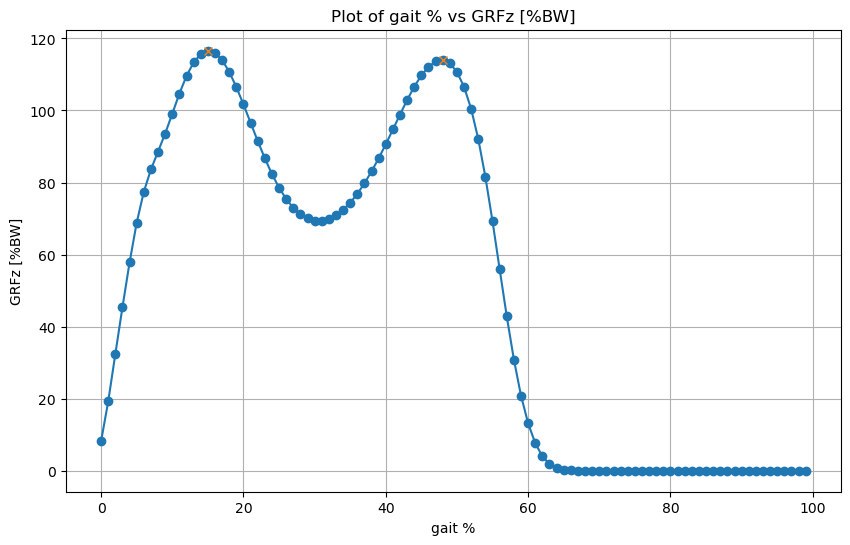

In [4]:
# Ensure data is 1D before plotting
gait_percentage = df['gait %'].values
grfz_bwf = df['GRFz [%BW]'].values

# Find peaks in the plots
peaks, _ = find_peaks(grfz_bwf, height=20)

# Find peak max values
peak_values = grfz_bwf[peaks]
peak_gait_percentages = gait_percentage[peaks]
sorted_indices = peak_values.argsort()[-2:][::-1] 
# Get indices of the two largest peaks 
for idx in sorted_indices:
    print(f'Peak value: {peak_values[idx]} at gait %: {peak_gait_percentages[idx]}')

# Plotting the first two columns
plt.figure(figsize=(10, 6))
plt.plot(gait_percentage, grfz_bwf, marker='o')
plt.title('Plot of gait % vs GRFz [%BW]')
plt.xlabel('gait %')
plt.ylabel('GRFz [%BW]')
plt.plot(peaks, grfz_bwf[peaks], "x")
plt.grid(True)
plt.show()


![Directions](Human_leg.jpg)

Since we are working on Anterior-Posterior direction. However the variation of forces is minimum as compared to perdominant forces vertical component of the ground reaction force. The variation of the ground reaction forces along the Anterior-Posterior direction is ploted below. 

In [7]:
# Convert relevant columns to numeric data types
df['gait %'] = pd.to_numeric(df['gait %'], errors='coerce') 
df['GRFx [%BW]'] = pd.to_numeric(df['GRFx [%BW]'], errors='coerce')
# Drop rows with NaN values if they exist
df = df.dropna(subset=['gait %', 'GRFx [%BW]'])

# Display the first few rows to verify
print(df.head())

   gait %  GRFz [%BW]  GRFx [%BW] MX_F [Nm/kg] Flex_Ext_F [deg] MX_K [Nm/kg]  \
1     0.0    8.242780    0.679562    -0.000292       111.796565     0.110179   
2     1.0   19.277127    0.565303      -0.0151       111.761732     0.297318   
3     2.0   32.449699   -1.766094    -0.054829       112.366473     0.330485   
4     3.0   45.423310   -5.831043    -0.124177       114.080546     0.245287   
5     4.0   57.844646   -9.759279    -0.192977        116.23646     0.139773   

  Flex_Ext_K [deg] MX_H [Nm/kg] Flex_Ext_H [deg]  
1        181.35691     0.210395        68.073381  
2       179.261086     0.599953        67.839519  
3       177.599945     0.745119        67.862718  
4       176.723198     0.694701        68.198489  
5       176.170763     0.606943        68.712198  


Peak value: 22.320469248453776 at gait %: 53.0
Minimum peak value: -21.782597255706786 at gait %: 11.0


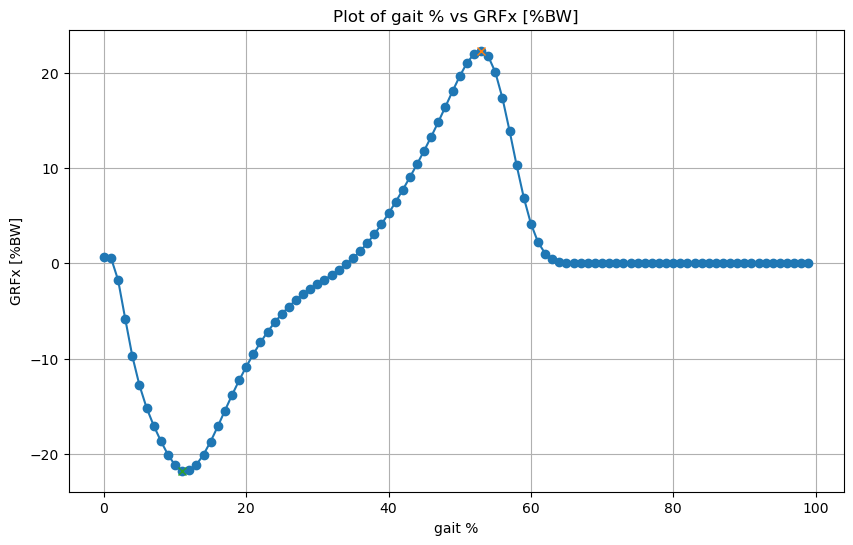

In [18]:
# Ensure data is 1D before plotting
gait_percentage = df['gait %'].values
grfx_bwf = df['GRFx [%BW]'].values

# Find peaks in the plots
peaks, _ = find_peaks(grfx_bwf, height=20)

# Find peak max values
peak_values = grfx_bwf[peaks]
peak_gait_percentages = gait_percentage[peaks]
sorted_indices = peak_values.argsort()[-2:][::-1] 
# Get indices of the two largest peaks 
for idx in sorted_indices:
    print(f'Peak value: {peak_values[idx]} at gait %: {peak_gait_percentages[idx]}')

# Find the minimum value
min_peak_value = grfx_bwf.min() 
min_peak_index = grfx_bwf.argmin() 
min_peak_gait_percentage = gait_percentage[min_peak_index]

# Print the minimum peak value and its corresponding gait percentage 
print(f'Minimum peak value: {min_peak_value} at gait %: {min_peak_gait_percentage}')

# Plotting the first two columns
plt.figure(figsize=(10, 6))
plt.plot(gait_percentage, grfx_bwf, marker='o')
plt.title('Plot of gait % vs GRFx [%BW]')
plt.xlabel('gait %')
plt.ylabel('GRFx [%BW]')
plt.plot(peaks, grfx_bwf[peaks], "x")
plt.plot(min_peak_gait_percentage,min_peak_value,"x" )
plt.grid(True)
plt.show()


Here you can see that the peak in upper half is **Anterior** and lower half is **Posterior**.
* First peak the minimum occurs at 11% of the gait cycle.
* Second peak, the maximum occurs at the 53% of the gait cycle.

which tells that magnitute of force is far less than that of the predominat vertical component of ground reaction force.

Now we have to model the angle sensor 

| Variable | Discription | Value
|----------|----------|---------|
| $V_{out}$    | Output Voltage   | ...|
| $V_{in}$  | Input Voltage   | $5V$|
|$V_{micro}$ |Input Voltage microcontroller | $3V$ |
| $R_{pot}$   | Variable resistance of Potentiometer  | ...|
|$R_{fixed}$ |Fixed resistance | $60k\ohm$ |
|$K_{deg}$ |Knee range of motion| $119.7^\circ$ to $184.9^\circ$ |
|$M$ |Microcontroller 8 bit ADC| 0 to 255 |


In [8]:
df = pd.read_excel('gait_data.xls', header=0, engine='xlrd')
Flex_Ext_K = df['Flex_Ext_K[deg]']
print(Flex_Ext_K)

0     181.356910
1     179.261086
2     177.599945
3     176.723198
4     176.170763
         ...    
95    182.955689
96    184.402107
97    184.925925
98    184.544014
99    183.399193
Name: Flex_Ext_K[deg], Length: 100, dtype: float64


In [9]:
max_value = df['Flex_Ext_K[deg]'].max()
min_value = df['Flex_Ext_K[deg]'].min()
print(f"max degree of knee:{max_value}")
print(f"min degree of knee:{min_value}")

max degree of knee:184.92592459760175
min degree of knee:119.7734084075935


Now we will find output voltage of Potentiometer

$$
V_{out} = V_{in}\cdot{\frac{R_{pot}}{R_{pot}+R_{fixed}}}
$$


Here why we chose $R_{fixed}$ because it is a standard choice in potentiometer circuits and the resulting output voltage $V_{out}$ remains within the range required by the $3V$ microcontroller ADC while scaling linearly with the angular position.

$$
R_{pot} = R_{fixed} \cdot \frac{K_{deg}}{\theta_{max}}
$$

Where $\theta_{max}$ is the maximum angular range of the potentiometer which is $270^\circ$.

The microcontroller's maximum input voltage is $3V$. ADC (8-bit) converts the voltage into a digital value: 

$$
\text{Digital\_value} = 255 \cdot \frac{V_{out}}{3V}
$$

ADC in the microcontroller converts the analog output voltage $V_{out}$ from the potentiometer into a digital number that the microcontroller can process. This is because microcontrollers can typically handle only digital signals, so any analog signals like $V_{out}$ must be converted to a digital format using the ADC.

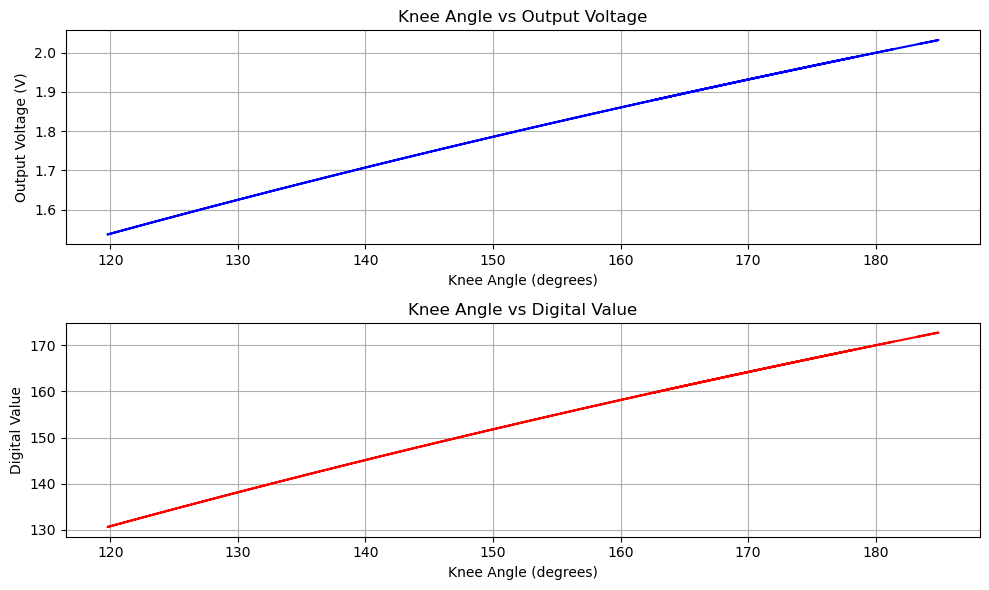

In [21]:
# Constants
V_in = 5  # Supply voltage in volts
V_micro = 3  # Maximum input voltage for microcontroller (3V)
R_fixed = 60e3  # Fixed resistance in ohms (60kΩ)
theta_max = 270  # Maximum angular range of potentiometer in degrees

Flex_Ext_K = df['Flex_Ext_K[deg]'].to_numpy()

# Calculate R_pot and V_out
R_pot = R_fixed * (Flex_Ext_K / theta_max)
V_out = V_in * (R_pot / (R_pot + R_fixed))

# Calculate digital values from ADC
digital_values = 255 * (V_out / V_micro)

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(Flex_Ext_K, V_out, label='Output Voltage (V_out)', color='b')
plt.xlabel('Knee Angle (degrees)')
plt.ylabel('Output Voltage (V)')
plt.title('Knee Angle vs Output Voltage')
plt.grid(True)
# plt.xlim(0, max(Flex_Ext_K))
# plt.ylim(0, max(V_out))


plt.subplot(2, 1, 2)
plt.plot(Flex_Ext_K, digital_values, label='Digital Value', color='r')
plt.xlabel('Knee Angle (degrees)')
plt.ylabel('Digital Value')
plt.title('Knee Angle vs Digital Value')
plt.grid(True)
# plt.xlim(0, max(Flex_Ext_K))  
# plt.ylim(0, 255) 

plt.tight_layout()
plt.show()
